## Predicting defaulting on Credit Card applications

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [2]:
# Setting the seed for reproducibility
np.random.seed(1738)

#### reading data 

In [3]:
df = pd.read_csv('../Data/credit_card_default_TRAIN.csv', header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 25 columns):
ID                            22500 non-null int64
LIMIT_BAL                     22500 non-null int64
SEX                           22500 non-null int64
EDUCATION                     22500 non-null int64
MARRIAGE                      22500 non-null int64
AGE                           22500 non-null int64
PAY_0                         22500 non-null int64
PAY_2                         22500 non-null int64
PAY_3                         22500 non-null int64
PAY_4                         22500 non-null int64
PAY_5                         22500 non-null int64
PAY_6                         22500 non-null int64
BILL_AMT1                     22500 non-null int64
BILL_AMT2                     22500 non-null int64
BILL_AMT3                     22500 non-null int64
BILL_AMT4                     22500 non-null int64
BILL_AMT5                     22500 non-null int64
BILL_AMT6               

In [7]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### Distribution of Payment

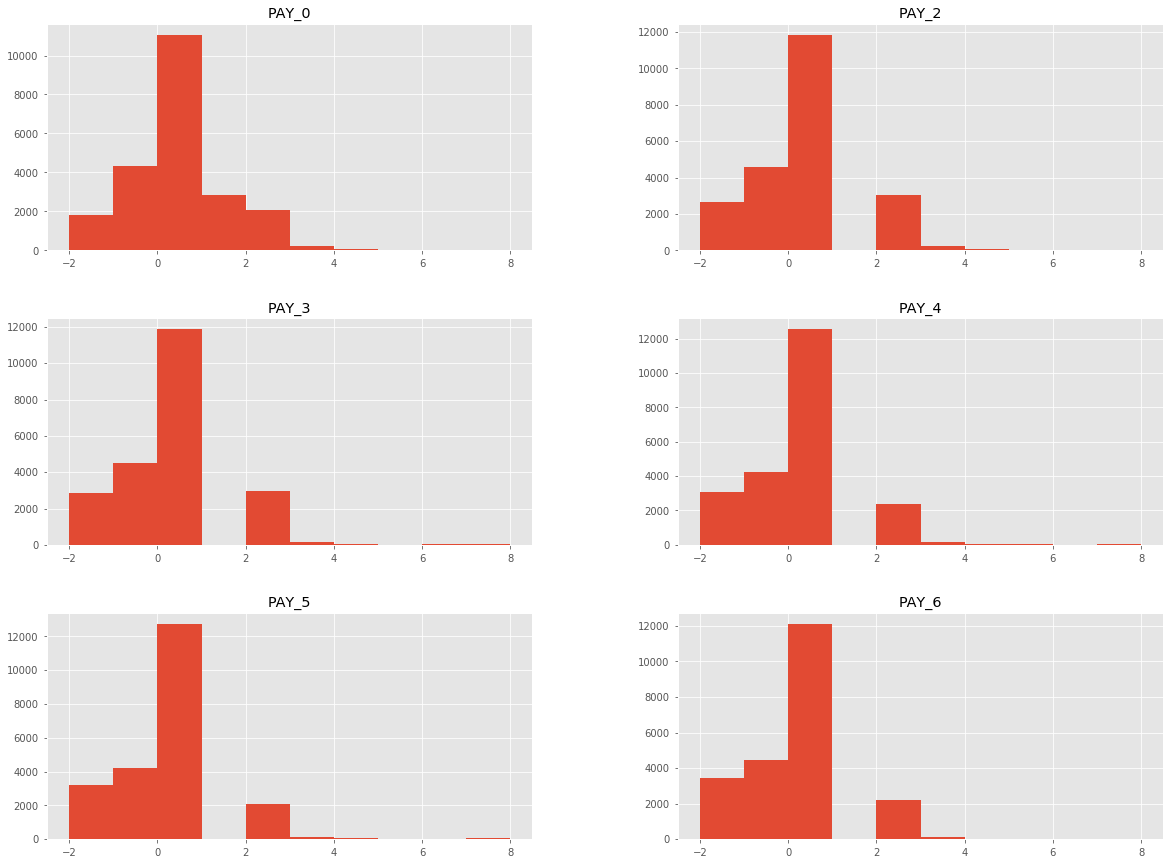

In [13]:
df.loc[:, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]\
    .hist(bins=10, figsize=(20,15))
plt.show()

#### From the above plot it is visible that some of the people make payment two months early, then more that that pay one month early. Majority of the people make payment on time, while some are running behind in payment.